## DSC 540 Project Milestone 
## Group 4
### Team Members: Markus Olson, Sarah Danielson, Amy Aumpansub, Charles Brantley

## <font color = blue>Motivation

### Problem Overview: 
- Every political campaign wishes there was a magical way to know who will vote for their candidate. Unfortunately, in the real world, every voter has their own unique expectations for a political party and a politician, and there is no way to guarantee success. Certainly, the 2016 election showed that polls alone are not always accurate. However, by analyzing the demographic makeup of counties, our project aims to understand those characteristics that are more likely to predict a win for a certain political party. This would be useful information for political campaigns to improve their strategies and better engage with voters to raise their likelihood of success.

### Project Goals:
- By applying several Machine Learning models to 2008 and 2012 election results, we hope to identify those features that were most important to voters to predict the results of the 2016 election. We will analyze these features to better understand what was and was not a factor in the Republican party winning the election in 2016.

### Data:

- We are using the USA 2016 Presidential Election dataset, retrieved from https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/table/?disjunctive.state.
- The dataset containing 3143 observations by county
- The dataset contains 159 independent attributes associated with each county in the US, including numeric attributes such as population and demographic characteristics.
- Some features are not related to our research questions and project goal, so we removed these from our analysis.
- We extract our target variable and independent features as follows:

#### Target Variable:

- The "target_winner" variable is extracted from the 2016 election columns which indicate the party of the winning candidate in that county. This boolean variable is a "1" if the percentage of votes for Republican candidate in that county is higher than that of Democratic candidate.
 

#### Independent Variables:
- Our final set of independent variables contains total 44 features, made up of 42 numeric features and 2 categorical features
- The features can also divided into Demographical and  Political  factors as follows:
- 1. Demographical Factors contain 37 features of each county, such as race, average education, age ranges, and average income. 
The summary of these features are as follows:
    - 1.1 A breakdown of the county's education level, which contains 5 features: 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 
    - 1.2 The median income of the county: 'Median Earnings 2010'
    - 1.3 A breakdown of the county by race, which contains 6 features: 'White (Not Latino) Population', 'African American Population', 'Native American Population', 'Asian American Population', 'Other Race or Races', 'Latino Population'
    - 1.4 Wage breakdown of the county, containing 6 features: 'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold',
       'Child.Poverty.living.in.families.below.the.poverty.line',
    - 1.5 The proportions of occupations in the county: 'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'Sire Homogeneity'
     - 1.6 The age of the average county resident: 'Median Age'
     - 1.7 Other health conditions: 'Poor.physical.health.days',
       'Poor.mental.health.days', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured'
- 2. Surroundings of county factors contain 5 features
    - 2.1 The unemployment rate: 'Unemployment'
    - 2.2 The crime rate: 'Violent.crime'
    - 2.3 The homicide rate: 'Homicide.rate'
    - 2.4 The death and infant mortality rates: 'Injury.deaths', 'Infant.mortality'
    
- 3. Previous election result features contains 2 features which are the election results from the previous presidential election in 2008 and 2012.
     - 3.1 "2008 winner" is the election result in 2008
     - 3.2 "2012 winner" is the election result in 2012.

### Updates on proposal

- The main goals of the project and methodology that we are using in this project still align to those stated in the proposal, as follows:
- The classification algorithms stated in our proposal will be applied to solve this supervised learning problem and develop models to predict a target binary attribute. Several Python libraries such as Pandas, Matplotlib, Scikit-learn and NumPy will be applied to this project. The models will be developed using KNN, Decision Tree, Logistic Regression, and Random Forest algorithms. 
- Additionally, we will utlize the Kernel SVM to built more complex models that can capture the features that have non-linear relationships.

## <font color = blue> Data Preprocessing

- Extracting our target variable and independent features
- Drop unrelated/extraneous features
- Create new features computed by the original independent features.
- Fill in the missing values with the mean values

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from UCI
df = pd.read_csv('election.csv', sep=';')

In [3]:
df.shape

(3143, 159)

In [4]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Georgia,GA,13089,"DeKalb County, Georgia",192.0,295871.0,254594.0,238224.0,65581.0,64392.0,...,322304.0,306265.0,2129.0,3649.0,0.011915,0.006606,0.212785,0.204829,0.787215,0.795171
1,Texas,TX,48487,"Wilbarger County, Texas",7.0,4101.0,1196.0,971.0,3283.0,2956.0,...,4509.0,3980.0,30.0,53.0,0.013317,0.006653,0.752737,0.732976,0.247263,0.267024
2,Virginia,VA,51111,"Lunenburg County, Virginia",12.0,5577.0,2703.0,2684.0,2900.0,2969.0,...,5650.0,5734.0,47.0,81.0,0.014126,0.008319,0.525208,0.517580,0.474792,0.482420
3,Georgia,GA,13297,"Walton County, Georgia",21.0,40425.0,8469.0,8148.0,27253.0,29036.0,...,36026.0,37612.0,304.0,428.0,0.011379,0.008438,0.780873,0.762919,0.219127,0.237081
4,North Carolina,NC,37011,"Avery County, North Carolina",19.0,8060.0,2178.0,1882.0,5681.0,5766.0,...,7943.0,7759.0,84.0,111.0,0.014306,0.010575,0.753923,0.722866,0.246077,0.277134


- The dataset contains 3143 rows, where each row represents a county
- The dataset contains 159 independent attributes associated with that county, including the numeric attributes such as Fips, Precincts, Votes, and Demographic characteristics of voters and the text attributes such as geo shape, candidate's names. Some features are not related to our research questions and project goal, so we will extract our own set of features.

In [5]:
df.describe(include='all')

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
count,3143,3142,3143.000000,3143,3111.000000,3.111000e+03,3.112000e+03,3.112000e+03,3112.000000,3112.000000,...,3.112000e+03,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
unique,51,51,NaN,3143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Texas,TX,NaN,"Franklin County, Indiana",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,254,254,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30390.411709,NaN,54.927997,4.176518e+04,2.229240e+04,2.113845e+04,19201.429306,19526.023136,...,4.208700e+04,4.138286e+04,593.165810,718.383355,0.018472,0.016468,0.607775,0.577527,0.392225,0.422473
std,NaN,NaN,15164.717720,NaN,172.872053,1.134234e+05,7.714042e+04,7.423506e+04,44865.312835,44782.529305,...,1.199522e+05,1.170526e+05,1856.868432,2310.513184,0.009095,0.008552,0.150378,0.140607,0.150378,0.140607
min,NaN,NaN,1001.000000,NaN,1.000000,6.400000e+01,8.000000e+00,5.000000e+00,67.000000,54.000000,...,7.900000e+01,6.400000e+01,0.000000,0.000000,0.000000,0.000000,0.060160,0.065992,0.034722,0.050314
25%,NaN,NaN,18178.000000,NaN,11.000000,4.837000e+03,1.810000e+03,1.558250e+03,2881.250000,2918.000000,...,4.974750e+03,4.837500e+03,71.000000,74.000000,0.012308,0.010618,0.515391,0.486565,0.283582,0.319085
50%,NaN,NaN,29177.000000,NaN,20.000000,1.094800e+04,4.505500e+03,3.999000e+03,6312.000000,6450.500000,...,1.105800e+04,1.080150e+04,169.500000,181.500000,0.017343,0.015728,0.620527,0.581609,0.379473,0.418391
75%,NaN,NaN,45082.000000,NaN,38.000000,2.880700e+04,1.238600e+04,1.136500e+04,16036.000000,16330.000000,...,2.916075e+04,2.847075e+04,446.000000,517.250000,0.023933,0.020763,0.716418,0.680915,0.484609,0.513435


#### 3143 entries, 159 columns.  dtypes: float64(147), int64(2), object(10)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 159 columns):
 #   Column                                                      Dtype  
---  ------                                                      -----  
 0   State                                                       object 
 1   ST                                                          object 
 2   Fips                                                        int64  
 3   County                                                      object 
 4   Precincts                                                   float64
 5   Votes                                                       float64
 6   Democrats 08 (Votes)                                        float64
 7   Democrats 12 (Votes)                                        float64
 8   Republicans 08 (Votes)                                      float64
 9   Republicans 12 (Votes)                                      float64
 10  Republicans

#### 10 columns are object datatypes

In [7]:
print(df.select_dtypes(include='object').columns)

Index(['State', 'ST', 'County', 'Temp Bins', 'Lon Bins', 'Precip Bins',
       'Elevation Bins', 'Geo Shape', 'Name 16', 'Name Prev'],
      dtype='object')


In [8]:
df.select_dtypes(include='object')

,State,ST,County,Temp Bins,Lon Bins,Precip Bins,Elevation Bins,Geo Shape,Name 16,Name Prev
0,Georgia,GA,"DeKalb County, Georgia","14.9,16.6","(-84.5,-82.1]","(1.27e+03,1.39e+03]","(259,317]","{""type"": ""Polygon"", ""coordinates"": [[[-84.3484...",DeKalb,DeKalb
1,Texas,TX,"Wilbarger County, Texas","16.6,18.5","(-100,-96.7]","(628,818]","(317,396]","{""type"": ""Polygon"", ""coordinates"": [[[-99.4752...",Wilbarger,Wilbarger
2,Virginia,VA,"Lunenburg County, Virginia",NaN,"(-82.1,-78.2]",NaN,NaN,"{""type"": ""Polygon"", ""coordinates"": [[[-78.3973...",Lunenburg,Lunenburg
3,Georgia,GA,"Walton County, Georgia",NaN,"(-84.5,-82.1]",NaN,NaN,"{""type"": ""Polygon"", ""coordinates"": [[[-83.9156...",Walton,Walton
4,North Carolina,NC,"Avery County, North Carolina","8.12,9.33","(-82.1,-78.2]","(1.27e+03,1.39e+03]","(1.01e+03,3.06e+03]","{""type"": ""Polygon"", ""coordinates"": [[[-82.0164...",Avery,Avery
...,...,...,...,...,...,...,...,...,...,...
3138,Tennessee,TN,"Obion County, Tennessee",NaN,"(-90.4,-87.2]","(1.27e+03,1.39e+03]","(38.9,105]","{""type"": ""Polygon"", ""coordinates"": [[[-89.2563...",Obion,Obion
3139,Michigan,MI,"Macomb County, Michigan",NaN,"(-84.5,-82.1]","(818,932]","(167,216]","{""type"": ""Polygon"", ""coordinates"": [[[-82.7292...",Macomb,Macomb
3140,West Virginia,WV,"Braxton County, West Virginia",NaN,"(-82.1,-78.2]","(1.19e+03,1.27e+03]","(216,259]","{""type"": ""Polygon"", ""coordinates"": [[[-80.9333...",Braxton,Braxton
3141,North Carolina,NC,"Mitchell County, North Carolina","10.7,12.0","(-84.5,-82.1]",NaN,"(572,1.01e+03]","{""type"": ""Polygon"", ""coordinates"": [[[-82.2451...",Mitchell,Mitchell


### 1. Create new target column "target_winner" and drop rows with missing values to extract target label
#### 1 = Republicans won, 0 = Democrats won

In [9]:
# Drop the rows with missing target variable
print(df['Republicans 2016'].isnull().sum())
print(df['Democrats 2016'].isnull().sum())

32
32


In [10]:
df = df.dropna(subset=['Republicans 2016', 'Democrats 2016'])  

In [11]:
print(df['Republicans 2016'].isnull().sum())
print(df['Democrats 2016'].isnull().sum())
df.shape

0
0


(3111, 159)

In [12]:
conditions = [
    (df['Republicans 2016'] > df['Democrats 2016']),
    (df['Republicans 2016'] < df['Democrats 2016'])]
choices = [1,0]

df["target_winner"] = np.select(conditions, choices, default='null')
df["target_winner"] = df["target_winner"].astype(int)

In [13]:
df["target_winner"][:5]

0    0
1    1
2    1
3    1
4    1
Name: target_winner, dtype: int64

In [14]:
df['Republicans 2016'][:5]

0    16.064771
1    77.200683
2    57.486104
3    76.915275
4    77.245658
Name: Republicans 2016, dtype: float64

In [15]:
df['Democrats 2016'][:5]

0    80.822723
1    19.678127
2    39.913932
3    20.479901
4    20.719603
Name: Democrats 2016, dtype: float64

### 2. Drop unrelated columns

#### Demographics

In [16]:
del_list= list(df)[2:3] + list(df)[4:14] + list(df)[35:36] +list(df)[43:50] +list(df)[52:54] + list(df)[70:-1]

In [17]:
print(del_list)

['Fips', 'Precincts', 'Votes', 'Democrats 08 (Votes)', 'Democrats 12 (Votes)', 'Republicans 08 (Votes)', 'Republicans 12 (Votes)', 'Republicans 2016', 'Democrats 2016', 'Green 2016', 'Libertarians 2016', 'Gini.Coefficient', 'White', 'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'White  Asian', 'lon', 'lat', 'CA', 'S', 'MAR', 'CFS', 'ACFS', 'Mean Alc', 'Max Alc', 'Mixedness', 'elevation', 'Annual Prcp', 'Winter Prcp', 'Summer Prcp', 'Spring Prcp', 'Autumn Prcp', 'Annual Tavg', 'Annual Tmax', 'Annual Tmin', 'Winter Tavg', 'Winter Tmax', 'Winter Tmin', 'Summer Tavg', 'Summer Tmax', 'Summer Tmin', 'Spring Tavg', 'Spring Tmax', 'Spring Tmin', 'Autumn Tavg', 'Autumn Tmax', 'Autumn Tmin', 'Nearest County', 'temp', 'precip', 'Temp Bins', 'Lat Bins', 'Lon Bins', 'Precip Bins', 'Elevation Bins', 'Geo Shape', 'Name 16', 'reporting', 'Votes16 Trumpd', 'Votes16 Clintonh', 'Votes16 Johnsong', 'Votes16 Steinj', 'Votes16 Castled', 'Votes16 De La Fuenter', 'Est Votes Remaining', 'Votes16 Mcmulli

In [18]:
df2 = df.drop(del_list, axis=1)

In [19]:
df2.columns

Index(['State', 'ST', 'County', 'Republicans 2012', 'Republicans 2008',
       'Democrats 2012', 'Democrats 2008', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occu

### 3. Create new features for winner in 2008 and 2012

#### Change 2008 and 2012 election results into Boolean

##### Changing 2008

In [20]:
print(df2['Republicans 2008'].isnull().sum())
print(df2['Democrats 2008'].isnull().sum())

0
0


In [21]:
conditions08 = [
    (df2['Republicans 2008'] > df2['Democrats 2008']),
    (df2['Republicans 2008'] < df2['Democrats 2008'])]
choices = [1,0]

df2["2008 winner"] = np.select(conditions08, choices, default='null')
df2["2008 winner"] = df2["2008 winner"].astype(int)

In [22]:
df2["2008 winner"][:5]

0    0
1    1
2    1
3    1
4    1
Name: 2008 winner, dtype: int64

In [23]:
df2['Republicans 2008'][:5]

0    20.347560
1    72.809936
2    51.327434
3    75.648143
4    71.522095
Name: Republicans 2008, dtype: float64

In [24]:
df2['Democrats 2008'][:5]

0    78.991883
1    26.524728
2    47.840708
3    23.508022
4    27.420370
Name: Democrats 2008, dtype: float64

##### Changing 2012

In [25]:
print(df2['Republicans 2012'].isnull().sum())
print(df2['Democrats 2012'].isnull().sum())

0
0


In [26]:
conditions12 = [
    (df2['Republicans 2012'] > df2['Democrats 2012']),
    (df2['Republicans 2012'] < df2['Democrats 2012'])]
choices = [1,0]

df2["2012 winner"] = np.select(conditions12, choices, default='null')
df2["2012 winner"] = df2["2012 winner"].astype(int)

In [27]:
df2["2012 winner"][:5]

0    0
1    1
2    1
3    1
4    1
Name: 2012 winner, dtype: int64

In [28]:
df2['Republicans 2012'][:5]

0    21.024929
1    74.271357
2    51.778863
3    77.198766
4    74.313700
Name: Republicans 2012, dtype: float64

In [29]:
df2['Democrats 2012'][:5]

0    77.783619
1    24.396985
2    46.808511
3    21.663299
4    24.255703
Name: Democrats 2012, dtype: float64

#### Now we can remove 2012 and 2008 Republican/Democrat results from df2

In [30]:
drop_these =['Democrats 2012', 'Republicans 2012', 'Democrats 2008', 'Republicans 2008']

In [31]:
df3 = df2.drop(drop_these, axis=1)

In [32]:
df3.shape

(3111, 48)

In [33]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3142
Data columns (total 48 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   State                                                       3111 non-null   object 
 1   ST                                                          3111 non-null   object 
 2   County                                                      3111 non-null   object 
 3   Less Than High School Diploma                               3111 non-null   float64
 4   At Least High School Diploma                                3111 non-null   float64
 5   At Least Bachelors's Degree                                 3111 non-null   float64
 6   Graduate Degree                                             3111 non-null   float64
 7   School Enrollment                                           3111 non-null   float64
 8 

### 4. Missing Values - filling missing numeric values with the mean

In [34]:
df3 = df2
df3.isnull().values.sum()

6624

In [35]:
df3 = df3.fillna(df3.mean())

In [36]:
df3.head()

,State,ST,County,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,...,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,target_winner,2008 winner,2012 winner
0,Georgia,GA,"DeKalb County, Georgia",21.024929,20.347560,77.783619,78.991883,12.1,87.9,38.7,...,1080.4,0.239,0.093,623.17,13.970000,51.7,8.500000,0,0,0
1,Texas,TX,"Wilbarger County, Texas",74.271357,72.809936,24.396985,26.524728,26.4,73.6,15.9,...,140.0,0.246,0.046,411.60,6.262827,70.4,7.729495,1,1,1
2,Virginia,VA,"Lunenburg County, Virginia",51.778863,51.327434,46.808511,47.840708,28.5,71.5,10.0,...,239.0,0.191,0.084,182.27,6.262827,92.5,7.729495,1,1,1
3,Georgia,GA,"Walton County, Georgia",77.198766,75.648143,21.663299,23.508022,19.6,80.4,17.3,...,102.2,0.203,0.085,231.26,4.350000,59.7,7.800000,1,1,1
4,North Carolina,NC,"Avery County, North Carolina",74.313700,71.522095,24.255703,27.420370,18.7,81.3,20.3,...,57.5,0.255,0.112,126.53,6.262827,80.2,7.729495,1,1,1


In [37]:
df3.isnull().values.sum()

0

In [38]:
df3.shape

(3111, 52)

#### Data is now cleaned

## <font color = blue> Data Exploration 

#### Basic Statistics

In [39]:
df3.describe()

,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,...,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,target_winner,2008 winner,2012 winner
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.00000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,59.670636,56.812707,38.481760,41.540440,16.912633,83.023079,18.997686,6.444536,75.014433,25435.382819,...,174.856017,0.17913,0.076888,256.412476,6.262827,75.734006,7.729495,0.843780,0.719061,0.777563
std,14.761418,13.825709,14.764096,13.848301,7.336561,7.483062,8.654629,3.854720,5.024146,5033.530215,...,197.916044,0.05404,0.027501,201.412171,2.934566,22.411738,1.679761,0.363122,0.449530,0.415950
min,7.278291,6.532557,3.448276,4.907975,0.700000,29.900000,3.700000,0.000000,38.000000,0.000000,...,11.000000,0.03100,0.008000,0.000000,0.610000,23.300000,2.600000,0.000000,0.000000,0.000000
25%,50.541707,47.747872,27.759834,31.402627,11.500000,78.400000,13.100000,4.000000,72.350000,22328.710478,...,71.800000,0.13950,0.058000,120.095000,6.262827,60.750000,7.600000,1.000000,0.000000,1.000000
50%,60.799843,57.224794,37.152128,41.086484,15.400000,84.600000,16.800000,5.300000,75.200000,24798.574605,...,162.700000,0.17700,0.075000,213.470000,6.262827,75.400000,7.729495,1.000000,1.000000,1.000000
75%,70.280499,66.876786,47.550173,50.461599,21.600000,88.500000,22.550000,7.700000,77.950000,27523.054762,...,174.856017,0.21300,0.093000,328.165000,6.262827,86.400000,7.729495,1.000000,1.000000,1.000000
max,95.862069,92.638037,91.446749,92.457110,52.100000,99.300000,71.000000,40.600000,100.000000,56674.350795,...,3764.100000,0.38900,0.283000,1989.540000,51.490000,257.300000,19.600000,1.000000,1.000000,1.000000


- The standard deviation above shows that some variables have large differences in their values.
- The 'Median Earnings', the 'Crime Rate', and the 'At least High School Diploma' variables have a large standard deviations, implying a large spread of their values.
- The 'Median Earnings' variable has the largest value of 56,674.00.
- The 'Median Earnings', 'African American Population', 'Native American Population', among several others, have the smallest value of 0.0.

#### Correlation Analysis

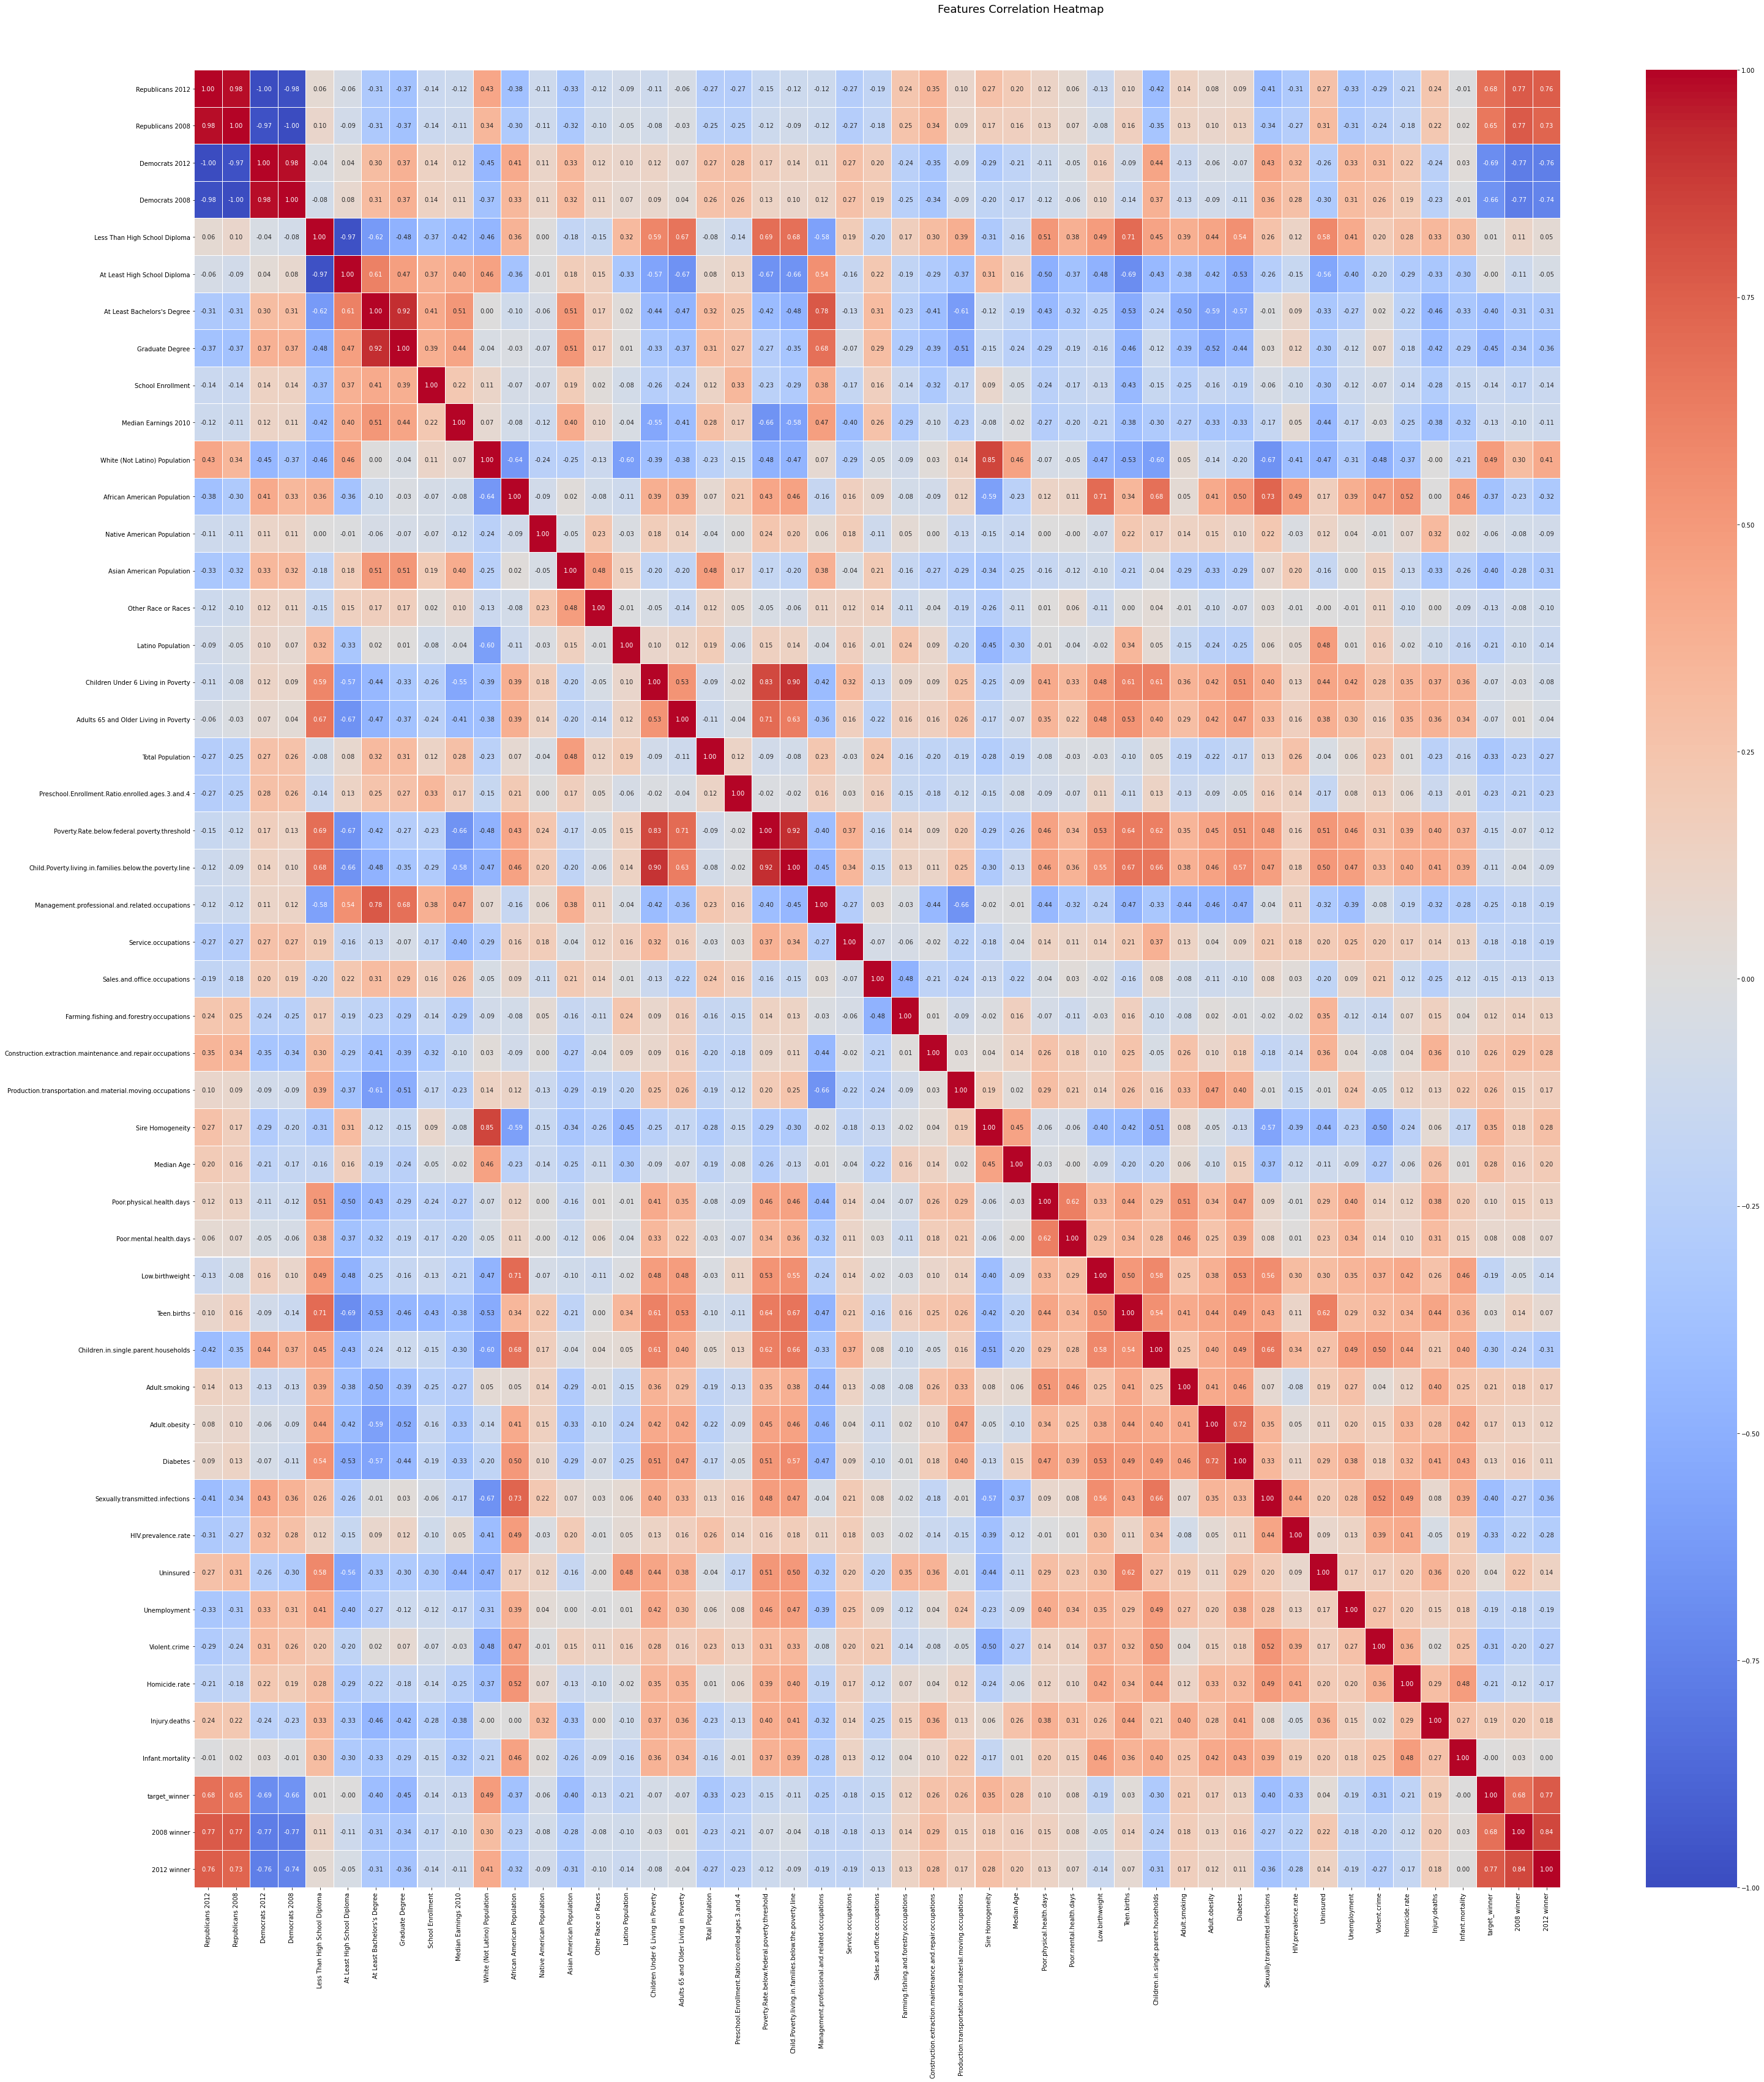

In [40]:
corr = df3.corr()
f, ax = plt.subplots(figsize=(50, 50))
t= f.suptitle('Features Correlation Heatmap', fontsize=18)
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.95)


- From the heatmap, the 'At Least Bachelors's Degree' variable is highly positively correlated with the 'Graduate Degree' variables, with the correlation values over 0.92, indicated in red color in the above heatmap.
- The election results in 2008 and 2012 are also highly correlated.
- The 'Median Earnings' is moderately positively correlated with the 'Education' variables and the 'White' population, indicated in orange above.
- There are low positive correlations between the health conditions and education levels. These correlation values are less than 0.2, indicated in blue above.
- There is a negative correlation between 'Unemployment Rate' and 'Education level higher than Bachelors's Degree', evidenced by the negative correlation value darker blue color in the above heatmap.

#### Histograms

In [41]:
# Create an array with the colors 
colors = ["#0d00ff", "#ed7572"]
# Set color palette
sns.set_palette(sns.color_palette(colors))

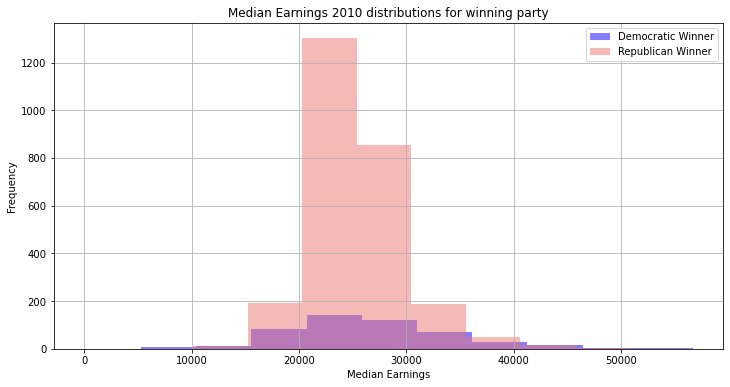

In [42]:
plt.figure(figsize=(12,6))
df3.groupby('target_winner')['Median Earnings 2010'].plot(kind ='hist', bins=10, alpha = 0.5, title='Median Earnings 2010 distributions for winning party', legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Median Earnings")
plt.show()

- The majority of counties that have Democratic winner have a median earning approximately between 21K and 25K.
- The majority of counties that have Republican winner have a median earning approximately between 20K and 24K.
- The lowest median income of counties with a Democratic winner is lower than that of the counties with a Republican winner.
- Similarily, the highest median earning of the counties with a Democratic winner is also higher than that of the counties with a Republican winner.
- This graph demonstrates a typical narrative of American politics: the average Republican voter is a wealthier White person living in a rural area, while the typical Democratic voter is more likely to live in a large, diverse city. It therefore also makes sense that there is a higher proportion of Republic winners in our graph; the counties won by Republicans are not as densely populated as those won by Democrats. It is important here to remember that this is not a representation of population but of individual counties.

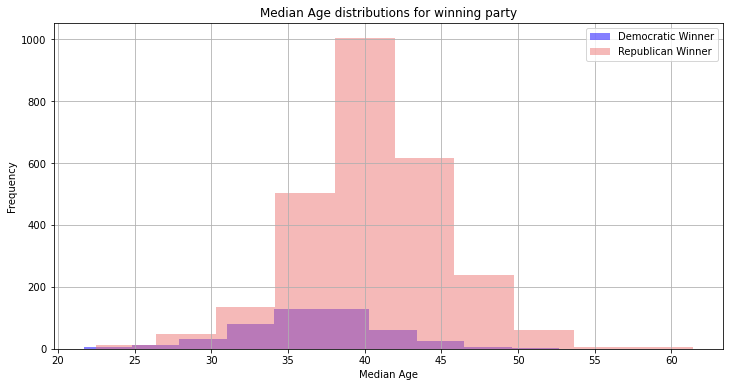

In [43]:
plt.figure(figsize=(12,6))
df3.groupby('target_winner')['Median Age'].plot(kind ='hist', bins=10, alpha = 0.5, title='Median Age distributions for winning party', legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Median Age")
plt.show()

- The majority of counties with a Democratic winner have a median age of between 34 and 40 years old. 
- The majority of counties with a Republican winner have a median age of between 38 and 42 years old. 
- The lowest median age of voters in counties with a Democratic winner is lower than the median age of counties with a Republican winner.
- Conversely, the highest median age of counties with a Republican winner is higher than the median age of counties with a Democratic winner.
- Again, this fits with the narrative in American politics that the older generation is more conservative and tends to vote Republican, while the younger generation tends to vote Democrat.

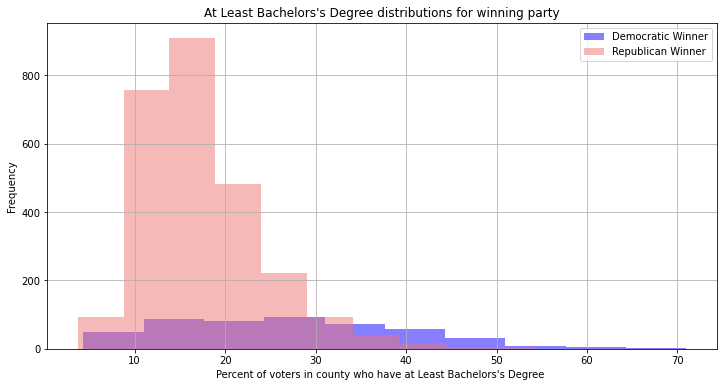

In [44]:
plt.figure(figsize=(12,6))
df3.groupby('target_winner')["At Least Bachelors's Degree"].plot(kind ='hist', bins=10, alpha = 0.5, title="At Least Bachelors's Degree distributions for winning party", legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Percent of voters in county who have at Least Bachelors's Degree ")
plt.show()

- The majority of counties that have a Democratic winner have a percentage of voters with at least a Bachelors's degree between 20% and 30%. 
- The majority of counties that have a Republican winner have a lower percentage of voters with at least a Bachelors's degree, between 15% and 20%. 
- The distribution of the counties with a Republican winner are skewed right, which has a mean greater than the median and mode.
- The highest percentage of the population with at least a Bachelors's degree in a county won by a Democrat is higher than that of the counties with a Republican winner. 

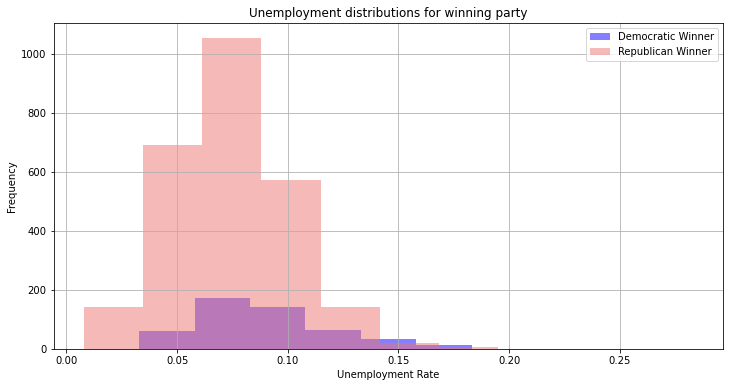

In [45]:
plt.figure(figsize=(12,6))
df3.groupby('target_winner')["Unemployment"].plot(kind ='hist', bins=10, alpha = 0.5, title="Unemployment distributions for winning party", legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Unemployment Rate")
plt.show()

- The majority of counties with a Democrat winner have an umemployment rate between 0.06 and 0.08, similar to the range in counties with a Republican winner.
- The lowest unemployment rate in counties with a Republican winner is lower than the rate in counties where a Democrat won.

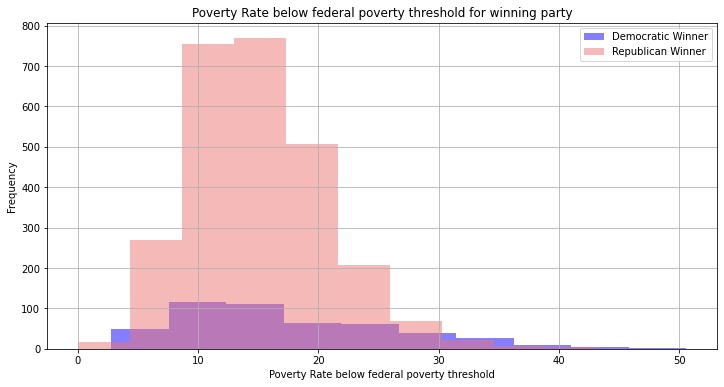

In [46]:
plt.figure(figsize=(12,6))
df3.groupby('target_winner')["Poverty.Rate.below.federal.poverty.threshold"].plot(kind ='hist', bins=10, alpha = 0.5, title="Poverty Rate below federal poverty threshold for winning party", legend =True,grid = True)
L=plt.legend()
L.get_texts()[0].set_text('Democratic Winner')
L.get_texts()[1].set_text('Republican Winner')
plt.xlabel("Poverty Rate below federal poverty threshold")
plt.show()

- The majority of counties with a Democratic winner have between 8% and 12% of their population below the poverty threshold.
- Counties with a Republican winner have a higher percentage, between 12% and 15% of their population is below the poverty threshold.
- The lowest poverty rate in counties with a Republican winner is lower than that of counties with a Democratic winner.

#### Scatter Plots

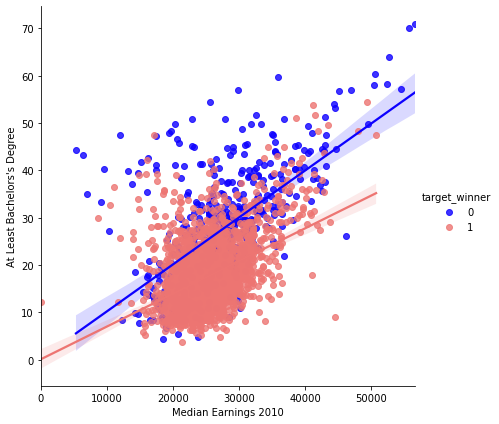

In [47]:
sns.set_palette(sns.color_palette(colors))
sns.lmplot("Median Earnings 2010", "At Least Bachelors's Degree", data =df3, fit_reg=True, aspect=1, height=6,hue='target_winner')
plt.show()

- For both Democratic winners and Republican winners, 'Median Earnings' and the 'At Least Bachelors's Degree' variables are positively correlated.
- The median earnings increase as the percentage of population in the county with at least a Bachelors's degree increases.

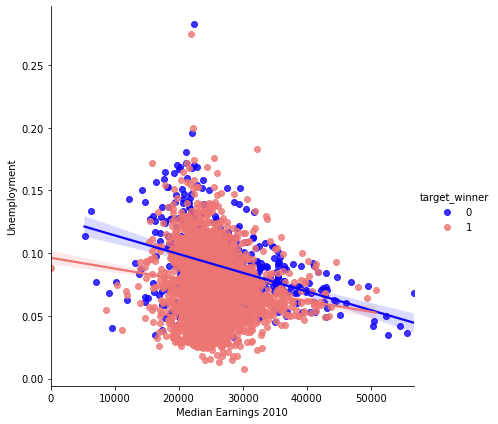

In [48]:
sns.set_palette(sns.color_palette(colors))
sns.lmplot("Median Earnings 2010", 'Unemployment', data =df3, fit_reg=True, aspect=1, height=6,hue='target_winner')
plt.show()

- For both Democratic winners and Republican winners, the 'Median Earnings' and 'Unemployment Rate; variables have a negative correlation.
- The median earnings increase as the unemployment rate decreases.

#### To further examine the relationship amonng features, we will use the pair grids

#### Pair Grids

In [49]:
selected_columns = ['Median Age', "At Least Bachelors's Degree", 'Homicide.rate', 'Poverty.Rate.below.federal.poverty.threshold','Unemployment', 'Violent.crime', 'target_winner']
subset =  df3[selected_columns]

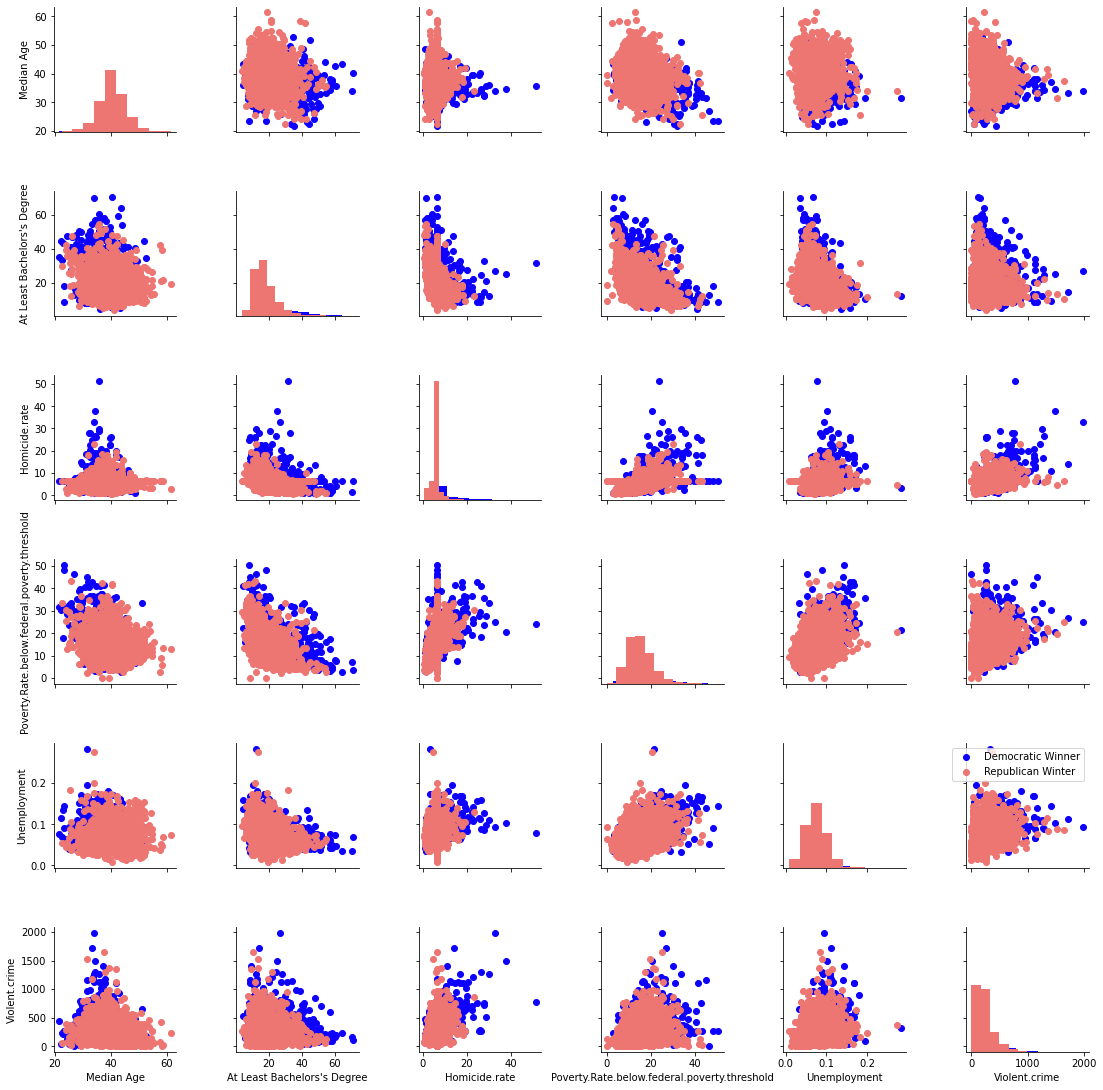

In [50]:
graph = sns.PairGrid(subset, hue="target_winner")
graph = graph.map_diag(plt.hist) 
graph = graph.map_offdiag(plt.scatter) 
plt.legend(labels=['Democratic Winner', 'Republican Winter'])
plt.show() 

- For both Democratic winners and Republican winners, the poverty rate and unemployment rate variables have a positive correlation. The poverty rate increases as the unemployment rate in the county increases.
- Similarily, for both Democratic winners and Republican winners, the homicide rate and violent crime rate variables have a positive correlation. 
- For all counties, the 'At Least Bachelors's Degree' variable has a negative correlation with the homicide rate, poverty, and violence crime rate variables.

### Split into Training, Validation, and Testing sets (with random seed of 4055)

In [51]:
X = df3.drop(['target_winner', 'State', 'ST', 'County'], axis=1)
y = df3["target_winner"]

In [52]:
random_seed=4055

In [53]:
class1 = (y == 1).sum()
class0 = (y == 0).sum()
print('Republican winners class 1: ',class1, "  Percent: " , (class1/3111)*100 )
print('Democrat winners class 0: ',class0, "    Percent: " , (class0/3111)*100)

Republican winners class 1:  2625   Percent:  84.37801350048217
Democrat winners class 0:  486     Percent:  15.62198649951784


In [54]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = random_seed, test_size= 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state = random_seed, test_size= 0.20)

In [55]:
cnt_train = y_train.value_counts()
per_train = y_train.value_counts(normalize=True)
cnt_val = y_val.value_counts()
per_val = y_val.value_counts(normalize=True)
cnt_test = y_test.value_counts()
per_test = y_test.value_counts(normalize=True)

pd.DataFrame({'Train_Count': cnt_train,'Val_Count': cnt_val, 'Test_Count': cnt_test, 'Train_Percent': per_train,'Val_Percent': per_val, 'Test_Percent': per_test})

,Train_Count,Val_Count,Test_Count,Train_Percent,Val_Percent,Test_Percent
1,1679,420,526,0.843719,0.843373,0.844302
0,311,78,97,0.156281,0.156627,0.155698


## We will use training and validation sets in model fitting and model comparison and keep the test set for evaluating and selecting the best model.

### Standarized Data

In [56]:
ss = preprocessing.StandardScaler()
X_ss = ss.fit_transform(X_train).tolist()
X_val_ss = ss.fit_transform(X_val).tolist()
X_test_ss = ss.fit_transform(X_test).tolist()
skf = StratifiedKFold(n_splits=5, random_state=random_seed)
skf.get_n_splits(X_ss, y_train)

5

## <font color = blue> Machine Learning Models

- Our team built models with various Machine Learning algorithms, including Logistic Regression, Decision Tree, Random Forest, and KNN. 
- The details of models can be found in the section below.
- For the future plan, we will build SVM models with kernel to capture the non-linear relationships.

## Part 1 Decision Tree

In [57]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [58]:
def computeAccuracy(myY_true, myY_pred):
    return metrics.accuracy_score(y_true = myY_true, y_pred = myY_pred)

In [59]:
def showMetrics(myTitle, myY_true, myY_pred):
    confusion_matrix =  pd.crosstab(index=np.ravel(myY_true), columns=myY_pred.ravel(), rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title(myTitle, fontsize = 15)
    plt.show()
    print(metrics.classification_report(y_true = myY_true, y_pred = myY_pred))

In [60]:
def plotValues(myTitle, myLabelX, myScores, myXList):
    plt.figure(figsize=(10,5))
    plt.title(myTitle)
    plt.plot(myScores, 'go--',label = 'validation')
    plt.xticks(np.arange(len(myXList)), myXList, rotation = 45)
    plt.xlabel(myLabelX)
    plt.ylabel('Accuracy Scores')
    plt.legend()
    plt.show()

### 1.1 Default Model

In [61]:
dt = DecisionTreeClassifier(random_state=random_seed)
dt.fit(X_train, y_train)

pred_train = dt.predict(X_train)
pred_val = dt.predict(X_val)

#Accuracy Train
print("Accuracy Scores (Train): ",computeAccuracy(y_train, pred_train))

#Accuracy Val
print("Accuracy Scores (Validation): ",computeAccuracy(y_val, pred_val))

Accuracy Scores (Train):  1.0
Accuracy Scores (Validation):  0.9799196787148594


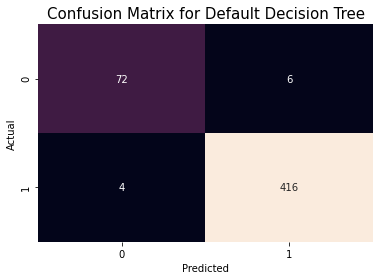

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           1       0.99      0.99      0.99       420

    accuracy                           0.98       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.98      0.98      0.98       498



In [62]:
showMetrics("Confusion Matrix for Default Decision Tree", y_val, pred_val)

### 1.2 Find the best value of minimum splits

In [63]:
MS_list = [10, 30, 50, 100, 150, 200, 300, 400, 500]
accuracy_valid = []
for ms in MS_list:
    dt = DecisionTreeClassifier(min_samples_split= ms, random_state = 42)
    dt.fit(X_train, y_train)
    pred_train = dt.predict(X_train)
    score_valid= cross_val_score(dt,X_train, y_train, scoring = "accuracy", cv =5 )
    accuracy_valid.append(score_valid.mean())
print("Accuracy score: ")
accuracy_valid

Accuracy score: 


[0.9618090452261308,
 0.9613065326633166,
 0.9577889447236181,
 0.9537688442211056,
 0.9396984924623115,
 0.9412060301507538,
 0.9412060301507538,
 0.9412060301507538,
 0.9412060301507538]

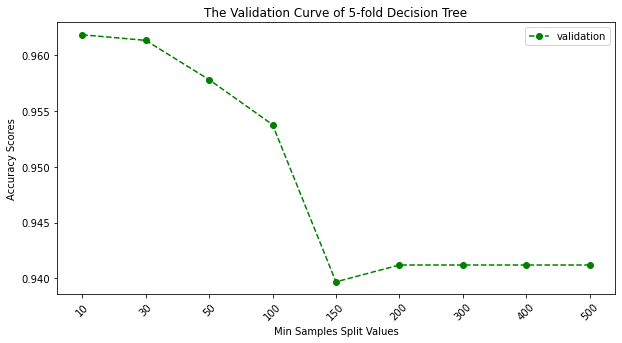

In [64]:
plotValues("The Validation Curve of 5-fold Decision Tree", 'Min Samples Split Values', accuracy_valid, MS_list )

### 1.2 GridSearchCV

To improve the performance, we can compute the class_weight using the sklearn.utils
Then, we will specify different class_weights in params for gridSerach so that the higher class-weight means you want to put more emphasis on a class. We will put more weight on the class 0 relative to class 1

In [65]:
# Compute class_weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[3.19935691 0.59261465]


In [66]:
MS_list = [50] #from part 1.2
MD_list = [2, 3, 5, 7, 10]
criterion_list = ['gini', 'entropy']
CW_list = [{ 0:1, 1: 1},{0:1.5, 1:1},{0:2, 1:1}, {0:3, 1:0.5} ]

params = {"criterion": criterion_list, 'min_samples_split': MS_list,"class_weight": CW_list,
         'max_depth': MD_list, 'random_state': [54]}
dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=dt, param_grid=params, cv=5, verbose =1, scoring="balanced_accuracy", n_jobs=-1)

In [67]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1.5, 1: 1},
                                          {0: 2, 1: 1}, {0: 3, 1: 0.5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_split': [50], 'random_state': [54]},
             scoring='balanced_accuracy', verbose=1)

In [68]:
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

{'class_weight': {0: 2, 1: 1}, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 50, 'random_state': 54}
DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=54)


#### Fit the GridSearch Model

In [69]:
dt_gs = DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=54)
dt_gs.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=5, min_samples_split=50, random_state=54)

#### Compute the Accuracy rates

In [70]:
pred_train = dt_gs.predict(X_train)
pred_val = dt_gs.predict(X_val)

#Accuracy Train
print("Accuracy Scores (Train): ",computeAccuracy(y_train, pred_train))

#Accuracy Val
print("Accuracy Scores (Validation): ",computeAccuracy(y_val, pred_val))

Accuracy Scores (Train):  0.9773869346733668
Accuracy Scores (Validation):  0.9678714859437751


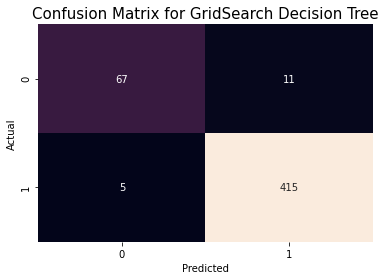

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.97      0.99      0.98       420

    accuracy                           0.97       498
   macro avg       0.95      0.92      0.94       498
weighted avg       0.97      0.97      0.97       498



In [71]:
showMetrics("Confusion Matrix for GridSearch Decision Tree", y_val, pred_val)

#### Decision Tree Comparison (Default Model vs GridSearchCV Model)

- The best model has higher accuracy and precision. The weighted avg accuracy, precision, recall, and f1 are also higher than the default model, so it performs better than the default model.
- The obvious improvement is that the GridSearchCV model can predict both class 0 (minority) and class 1(majority) well as we specify the class weight and use the balanced accuracy score in GridSearchCV.
- Comparing to the default model, the best model is less overfitting as the accuracy rate of train and test set are high and close to each other.

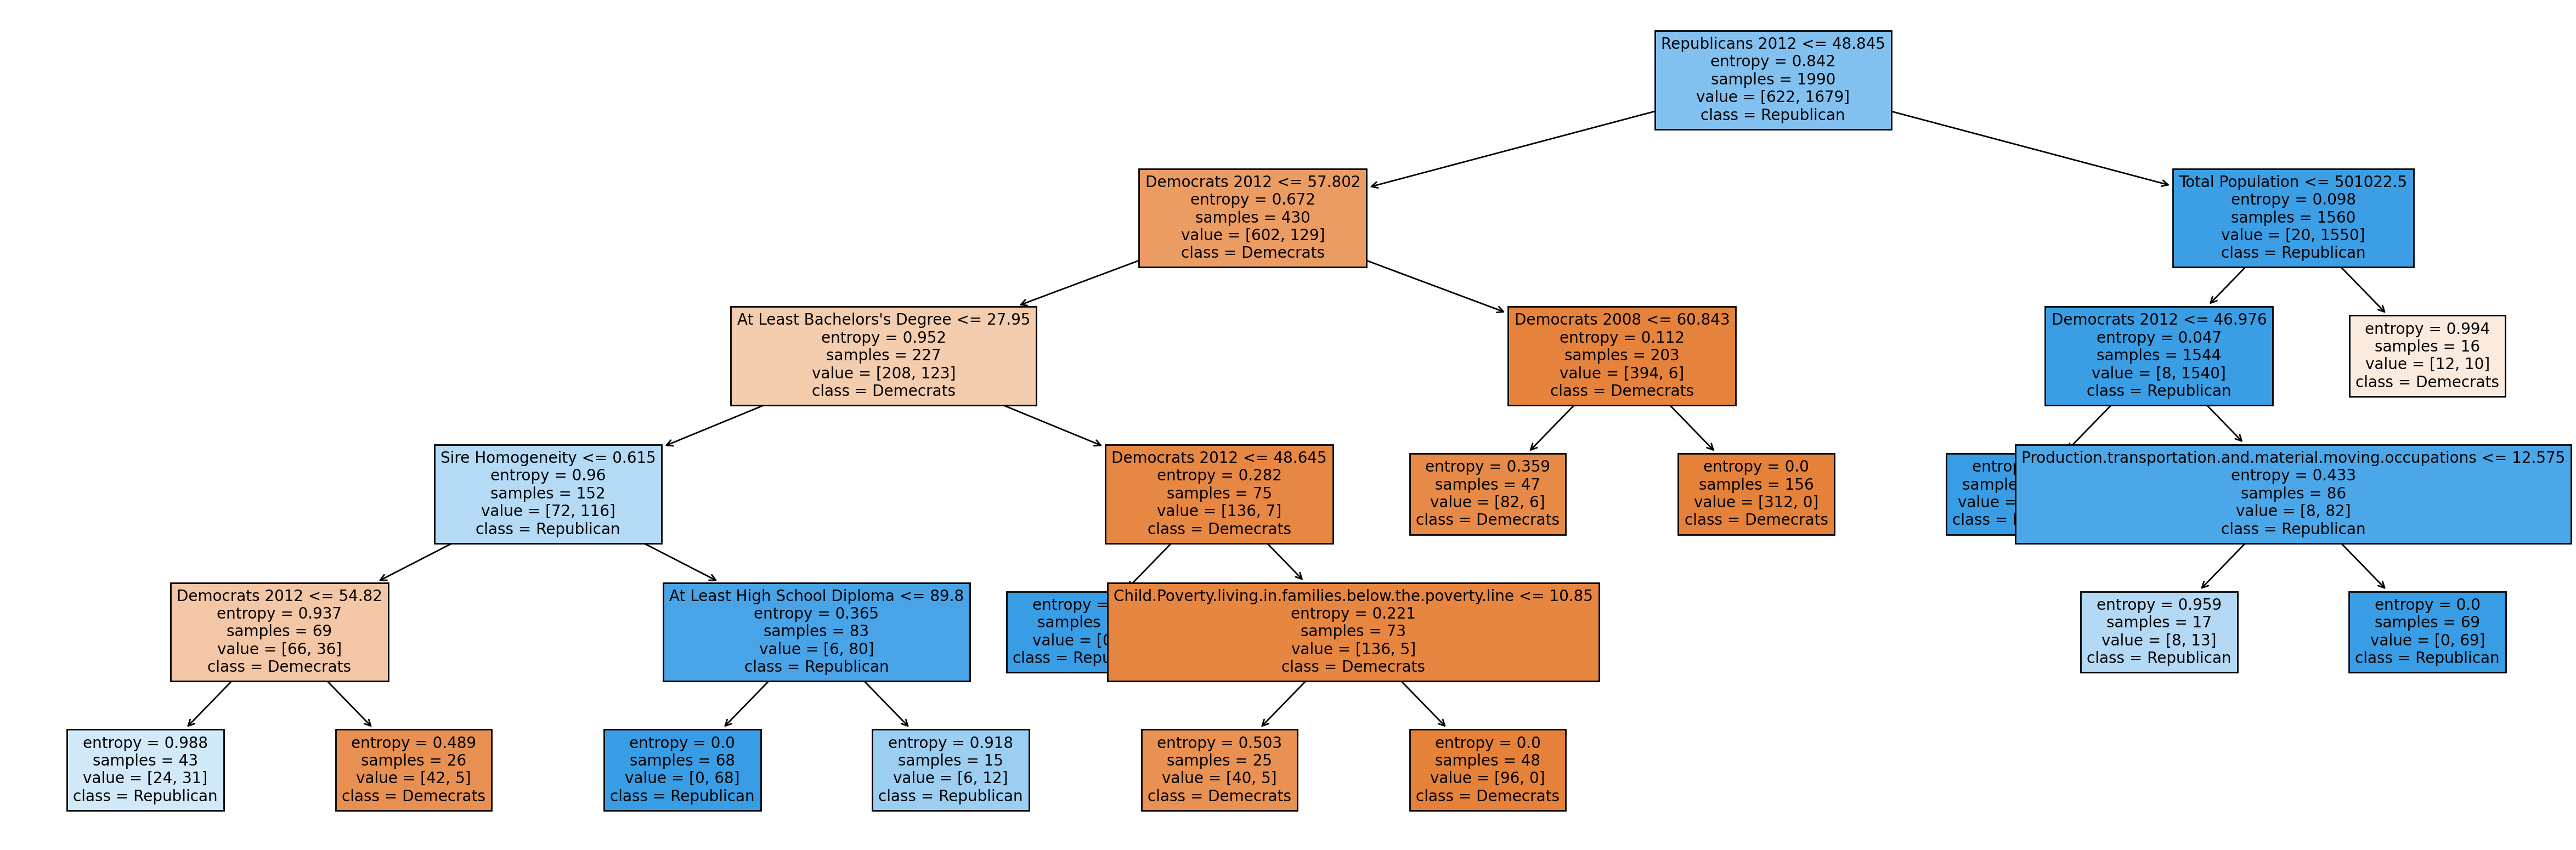

In [72]:
from sklearn import tree
fn = X_train.columns
cn = ['Demecrats','Republican']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,10), dpi=200)
tree.plot_tree(dt_gs,feature_names = fn, class_names=cn, filled = True, fontsize=10);

- Based on the decision tree classifier, we can conclude that The most important variables to predicting the outcome of an election are the winning result from the previous election in year 20012.
- Additionally, the median age and race features play important roles on the voters' preferences on a political party.
- We can derive the clssification rules as follow: if the median age of the voters in the county is less than 38.15 years old, it is likely that the democatic candidate will win the election for that county.
- Additionally, if the county has the percentage of Asian American voters less than 2.5%, the democatic candidate will be likely to win the election. On the other hand, if the percentage of White voters are less than 47%, the Republican candidate has a high chance to win the election.
- The education level also play an important role in which if the percentage of voters in the county who has at keast bachelor's degree is less than 18%, the Republican candidate is likely to win the election for that county.

### 1.3 Feature Selection 

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100, random_state=random_seed)
model.fit(X_train, y_train)
imp = model.feature_importances_
feat_importances = pd.Series(imp, index=X_train.columns)
feat_importances

Republicans 2012                                              0.091025
Republicans 2008                                              0.059720
Democrats 2012                                                0.074390
Democrats 2008                                                0.062897
Less Than High School Diploma                                 0.007424
At Least High School Diploma                                  0.006526
At Least Bachelors's Degree                                   0.022720
Graduate Degree                                               0.021424
School Enrollment                                             0.004067
Median Earnings 2010                                          0.007093
White (Not Latino) Population                                 0.033040
African American Population                                   0.023933
Native American Population                                    0.004795
Asian American Population                                     0.018481
Other 

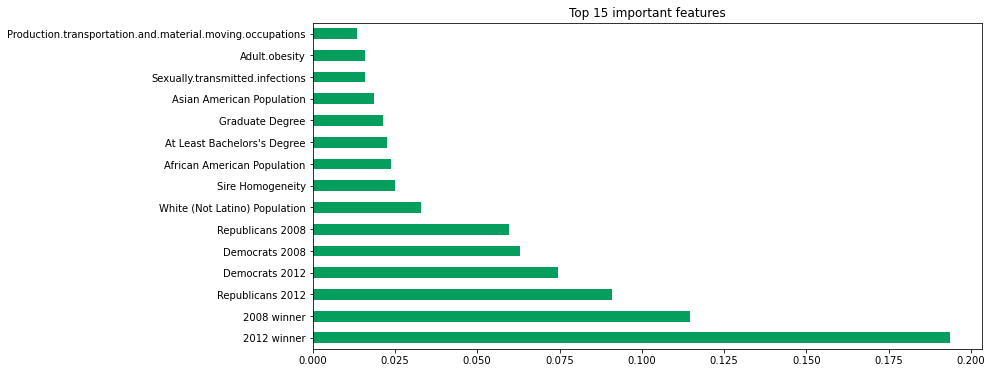

In [74]:
colors = ["#059e5c"]
# Set color palette
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

- The most important variables to predicting the outcome of an election are the winning result from the previous election in year 2008 and 2012.
- Other demograhic variables related to race, education level, median ages, and household condition also have a high influence on the target variable as their important scores are significantly higher than other features.

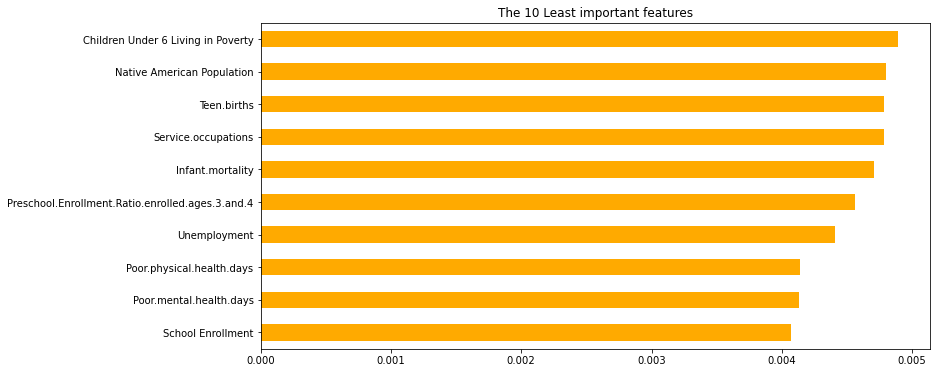

In [75]:
colors = ["#ffaa00"]
# Set color palette
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
feat_importances.nsmallest(10).plot(kind='barh')
plt.title("The 10 Least important features")
plt.show()

- Comparing to the features that are related to demograhics of voters, the features that are related to health condition such as infant mortality and surrounding of counties has a less influence on the prediction outcome.

- Based on feature selection, we will build new models (in coming weeks) from the set of important features found in this section and perform model evalution to compare the models fitted with the original features and selected features.

### Part 2 - Logistic Regression

In [76]:
# Import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [77]:
def evaluate_results(test, train, train_target, test_target, model):
    '''This function will print evaluation metrics'''
    
    pred_test = model.predict(test)
    
    probs_test = model.predict_proba(test)[:, 1]
    probs_train = model.predict_proba(train)[:, 1]
    
    print()
    print('Test Accuracy = {0:.4f}'.format(model.score(test, test_target)))
    print('Train Accuracy = {0:.4f}'.format(model.score(train, train_target)))
    print()
    print('Train ROC AUC Score: {0:.4f}'.format(roc_auc_score(train_target, probs_train)))
    print('Test ROC AUC  Score: {0:.4f}'.format(roc_auc_score(test_target, probs_test)))
    print()
    print('Test Recall: {0:.4f}'.format(recall_score(test_target, pred_test)))
    print('Test Precision: {0:.4f}'.format(precision_score(test_target, pred_test)))
    print()
    
    fpr, tpr, _ = roc_curve(test_target,  probs_test)
    auc = roc_auc_score(test_target, probs_test)
 
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves');
    plt.show()

In [78]:
def plot_coeff(model, test_data):
    coef_dict = {}
    for coef, feat in zip(model.coef_[0,:], test_data):
        coef_dict[feat] = coef    
    # sorted dict    
    {k: v for k, v in sorted(coef_dict.items(), reverse=True, key=lambda item: item[1])}
    
    coeff_df = pd.DataFrame(coef_dict.items(), index = coef_dict.keys())
    print()
    print(coeff_df.iloc[:,1])
    coeff_df[0:].plot(kind = 'barh', 
                      figsize = (10,10),
                      title = 'Coefficients')

### 2.1 - Initial Model

In [79]:
# initiate the classifier
base_clf = LogisticRegression(random_state = random_seed)

# fit the model
base_clf.fit(X_train, y_train)


LogisticRegression(random_state=4055)


Test Accuracy = 0.9719
Train Accuracy = 0.9704

Train ROC AUC Score: 0.9955
Test ROC AUC  Score: 0.9944

Test Recall: 0.9905
Test Precision: 0.9765



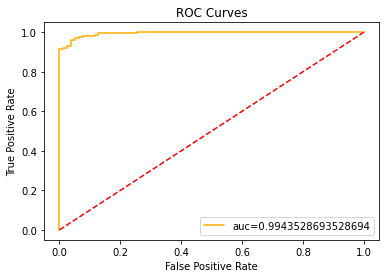

In [80]:
# evaluate results
evaluate_results(X_val, X_train, y_train, y_val, base_clf)

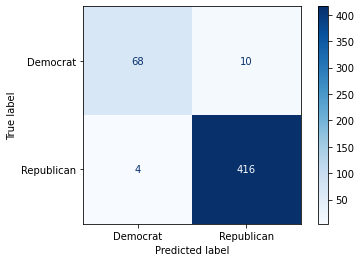

In [81]:
# confusion Matrix
disp = plot_confusion_matrix(base_clf, 
                             X_val, y_val,
                             display_labels=['Democrat','Republican'],
                             values_format= '.0f',
                             cmap=plt.cm.Blues)

In [82]:
# display metrics
test_pred = base_clf.predict(X_val)
print(classification_report(y_val, test_pred))
print('Balanced Accuracy =', round(metrics.balanced_accuracy_score(y_val, test_pred),2))
print('Specificity = ',round(1 - metrics.recall_score(y_val, test_pred),2))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91        78
           1       0.98      0.99      0.98       420

    accuracy                           0.97       498
   macro avg       0.96      0.93      0.95       498
weighted avg       0.97      0.97      0.97       498

Balanced Accuracy = 0.93
Specificity =  0.01


-----


You can see from the results above that the generic model performed quite well with a 92.77% accuracy. Based on the AUC, Balanced and ROC curve, I can see the model is balanced out nicely with and performing well in perms of FP, FN, TP, TN. 



-----

### 2.2 Hyper-parameter tuning

#### Perform Randomized Search

In [83]:
# Hyperparameter grid for randomized search
param_grid = {
    'solver': ['lbfgs','liblinear','sag','saga'],
    'penalty': ['l1','l2'],
    'tol': list(np.arange(.00001,.1, .005).astype(float)),
    'C': list(np.arange(.0001,.1, .007).astype(float)),
}

# Estimator for use in random search
estimator = LogisticRegression(random_state = random_seed)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        cv = 10, n_iter = 10, verbose = 1, random_state=random_seed)

# Fit 100 different models to search for optimal params
rs.fit(X_train, np.ravel(y_train))

# Get the best parameters
rs.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


{'tol': 0.02001,
 'solver': 'liblinear',
 'penalty': 'l1',
 'C': 0.08410000000000001}

#### Grid Search

In [84]:
# now perform grid search with all parameters selected intelligently 
param_grid = {
    'tol': list(np.arange(.007,.13, .01).astype(float)),
    'C': list(np.arange(.04,.14, .01).astype(float))
}

# search through the grid
tuned_lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state = random_seed)

gs = GridSearchCV(tuned_lr, param_grid, verbose=1, cv=5, n_jobs = -1)
gs.fit(X_train, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 650 out of 650 | elapsed:    2.9s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=4055,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.04, 0.05, 0.060000000000000005, 0.07,
                               0.08000000000000002, 0.09000000000000001, 0.1,
                               0.11000000000000001, 0.12000000000000002,
                               0.13000000000000003],
                         'tol': [0.007, 0.017, 0.027000000000000003,
                                 0.037000000000000005, 0.04700000000000001,
                                 0.05700000000000001, 0.06700000000000002,
                                 0.07700000000000001, 0.08700000000000002,
                                 0.09700000000000003, 0.10700000000000003,
                                 0.11700000000000002, 0.12700000000000003]},
             verbose=1)

In [85]:
# look at best values
print('Best parameters:', gs.best_params_ )
print('Best Score:', gs.best_score_)

Best parameters: {'C': 0.060000000000000005, 'tol': 0.007}
Best Score: 0.9814070351758793


-----

The first step of parameter tuning was to perform randomized search. This allowed me to narrow the window for grid search. I do this so that I can hone in on a specific range of parameters to tune. The next step is to perform the actual grid search. The two main parameters to tune were 'C', which is the inverse of regularization strength, and 'tol' which stands for tolerance. I also found that the best model used a liblinear solver and favored l1 regularization of l2. 

-----

### 2.3 - Evaluate Best Fit Model


Test Accuracy = 0.9799
Train Accuracy = 0.9844

Train ROC AUC Score: 0.9983
Test ROC AUC  Score: 0.9968

Test Recall: 0.9905
Test Precision: 0.9858



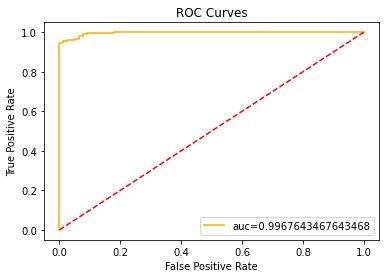

In [86]:
# Tuned model
tuned_lr = LogisticRegression(solver = 'liblinear', 
                              penalty = 'l1', 
                              C = .06,
                              tol = .007,
                              random_state = random_seed)

# fit the model
tuned_lr.fit(X_train, y_train)

# evaluate results
evaluate_results(X_val, X_train, y_train, y_val, tuned_lr)

In [87]:
# display metrics
test_pred = tuned_lr.predict(X_val)
print(classification_report(y_val, test_pred))
print('Balanced Accuracy =', round(metrics.balanced_accuracy_score(y_val, test_pred),2))
print('Specificity = ',round(1 - metrics.recall_score(y_val, test_pred),2))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           1       0.99      0.99      0.99       420

    accuracy                           0.98       498
   macro avg       0.97      0.96      0.96       498
weighted avg       0.98      0.98      0.98       498

Balanced Accuracy = 0.96
Specificity =  0.01


#### A plot of probabilities 

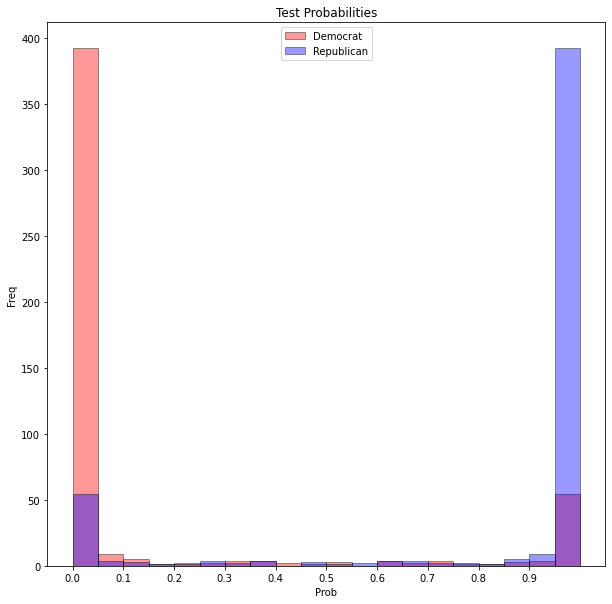

In [88]:
test_probs = tuned_lr.predict_proba(X_val)

Democrat = list(test_probs[:,0])
Republican = list(test_probs[:,1])

plt.figure(figsize = (10,10))
plt.hist(Democrat, 
              color = 'red', 
              edgecolor = 'black', 
              bins = 20,
              alpha = .4,
              label = 'Democrat')

plt.hist(Republican, 
              color = 'blue', 
              edgecolor = 'black', 
              bins = 20,
              alpha = .4,
              label = 'Republican')
plt.legend(loc = 'upper center')
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel('Prob')
plt.ylabel('Freq')
plt.title('Test Probabilities')
plt.show()

-----

We can see that I was able to improve the accuracy to 98.44%. We managed to improve the other evaluation metrics as well and nearly are able to perfectly predict which party will win in that county. 

The purpose of the probability plot is to evaluate at the percentage level how the model is predicting each class. Our model is very good, but what I am looking for is a nice U shape like this plot. If I were to see a spike around the 50% probability tick, then we would have a frequency count of the amount of time our model is no better than a coin flip. 

----

### 2.4 - Coefficients and Feature Exploration


Republicans 2012                                              0.174094
Republicans 2008                                              0.165949
Democrats 2012                                               -0.122824
Democrats 2008                                               -0.110263
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.000029
At Least Bachelors's Degree                                  -0.243238
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000015
White (Not Latino) Population                                 0.048841
African American Population                                  -0.092029
Native American Population                                    0.015525
Asian American Population                                    -0.060076
Other

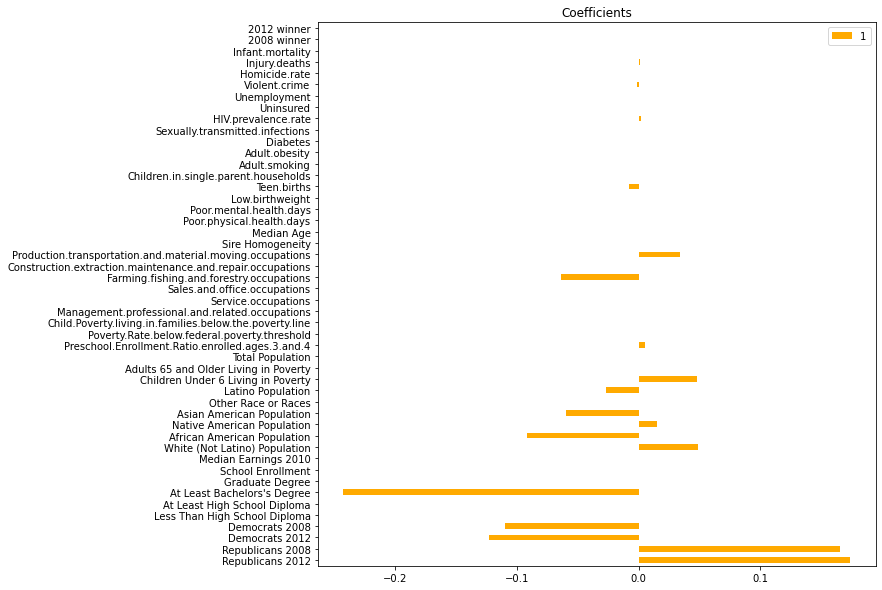

In [89]:
plot_coeff(tuned_lr, X_val)

---

We can see from above that because this model used l1 regularization, we actually pushed quite a few coefficients to 0. This would mean that these can be removed from the model entirely. We actually reduce the number of features from 48 to 17. 

Because our data is scaled, we could in turn say that the 3 most significant features for logistic regression are:
 - At least a Bachelor's Degree
 - Party choice in 2016
 - Party choice in 2012

---

## Part 3 Random Forest

In [90]:
#importing random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [91]:
#creating a function that will spit out key metrics I want to evaluate from my model
def evaluation_metrics(X_train, X_test, y_train, y_test, model):
    'This will produce and print the evaluation metrics for each model'
    
    pred_test = model.predict(X_test)
    
    print('Training Accuracy = {0:.3f}'.format(model.score(X_train, y_train)))
    print('Testing Accuracy = {0:.3f}'.format(model.score(X_test, y_test)))
    print('Recall = {0:.3f}'.format(recall_score(y_test, pred_test)))
    print('Precision = {0:.3f}'.format(precision_score(y_test, pred_test)))
    print('Balanced Accuracy = {0:.3f}'.format(balanced_accuracy_score(y_test, pred_test)))
    print('F1 Score = {0:.3f}'.format(f1_score(y_test, pred_test)))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

In [92]:
def plot_coeff(model, test_data):
    coef_dict = {}
    for coef, feat in zip(model.coef_[0,:], test_data):
        coef_dict[feat] = coef    
    # sorted dict    
    {k: v for k, v in sorted(coef_dict.items(), reverse=True, key=lambda item: item[1])}
    
    coeff_df = pd.DataFrame(coef_dict.items(), index = coef_dict.keys())
    print()
    print(coeff_df.iloc[:,1])
    coeff_df[0:].plot(kind = 'barh', 
                      figsize = (10,10),
                      title = 'Coefficients')

### 3.1 - Initial Model

In [93]:
rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=4055)

In [94]:
evaluation_metrics(X_train, X_test, y_train, y_test, rf)

Training Accuracy = 1.000
Testing Accuracy = 0.976
Recall = 0.983
Precision = 0.989
Balanced Accuracy = 0.961
F1 Score = 0.986

Confusion Matrix:
[[ 91   6]
 [  9 517]]


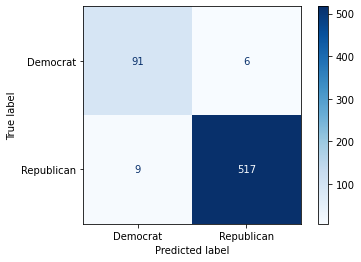

In [95]:
# confusion Matrix
disp = plot_confusion_matrix(rf, 
                             X_test, y_test,
                             display_labels=['Democrat','Republican'],
                             values_format= '.0f',
                             cmap=plt.cm.Blues)

- Based on the running of my model just using the default value it is looking really good at predicting the  winner in the county.
- With training and trating coming in at 100% and 96.5% respectivly we are doing really well.
- The recall and F score ar both at 97% whick is another strong indicator.

### 3.2 Hyper-parameter tuning

In [96]:
# Hyperparameter grid for randomized search
parameters= {'criterion':['gini', 'entropy'],'min_samples_split':[10,25,50,100,250,500,1000] ,
            'max_depth':[3,5,7,10,25,50,100],
            'n_estimators':[5,10,25,25,50], 'max_features':['auto', 'sqrt', 'log2']}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = random_seed)

# Create the random search model
rs = RandomizedSearchCV(estimator, parameters, n_jobs = -1, 
                        cv = 10, n_iter = 10, verbose = 1, random_state=random_seed)

# Fit 100 different models to search for optimal params
rs.fit(X_train, np.ravel(y_train))

# Get the best parameters
rs.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished


{'n_estimators': 50,
 'min_samples_split': 50,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'gini'}

### Grid Search

In [97]:
#creating parameters for creating the random forest
parameters={"min_samples_split":[10,25,50,100,250,500,1000] ,
            'max_depth':[3,5,7,10,25,50,100],
            'n_estimators':[5,10,25,25,50]}

In [98]:
tuned_rf = RandomForestClassifier(criterion= 'entropy' ,max_features= 'auto',random_state = random_seed)

In [99]:
RFgrid_cv=GridSearchCV(estimator=tuned_rf,param_grid= parameters, cv= 5,scoring = 'recall')

In [100]:
#fitting the grid and preforming the CV search to get scores for all combinations
RFgrid_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=4055),
             param_grid={'max_depth': [3, 5, 7, 10, 25, 50, 100],
                         'min_samples_split': [10, 25, 50, 100, 250, 500, 1000],
                         'n_estimators': [5, 10, 25, 25, 50]},
             scoring='recall')

In [101]:
#returning the best combination of my parameters
RFgrid_cv.best_estimator_ 

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=1000,
                       n_estimators=5, random_state=4055)

### 3.3 - Evaluate Best Fit Model

In [102]:
final_RF=RandomForestClassifier(criterion= 'entropy' ,max_features= 'auto',max_depth=3, min_samples_split=1000
                                ,n_estimators=5,random_state = random_seed)
final_RF=final_RF.fit(X_train,y_train)

In [103]:
evaluation_metrics(X_train, X_test, y_train, y_test, final_RF)

Training Accuracy = 0.957
Testing Accuracy = 0.934
Recall = 0.970
Precision = 0.953
Balanced Accuracy = 0.856
F1 Score = 0.961

Confusion Matrix:
[[ 72  25]
 [ 16 510]]


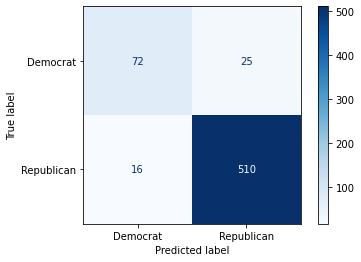

In [104]:
# confusion Matrix
disp = plot_confusion_matrix(final_RF, 
                             X_test, y_test,
                             display_labels=['Democrat','Republican'],
                             values_format= '.0f',
                             cmap=plt.cm.Blues)

- Both my test and training accuracy went down when optimizing the model
- That said my tresting and training accuracy is now closer at 91.1 and 90.5 making this slightly better
- Also in the tuning I was able to better my confussion matix values

### 2.4 - Coefficients and Feature Exploration

In [105]:
#getting information on scorring of importacne of features in the model
rf_feat = final_RF.feature_importances_
rf_feat_importances = pd.Series(rf_feat, index=X_train.columns)
rf_feat_importances

Republicans 2012                                              0.000000
Republicans 2008                                              0.132213
Democrats 2012                                                0.000000
Democrats 2008                                                0.252717
Less Than High School Diploma                                 0.000000
At Least High School Diploma                                  0.051344
At Least Bachelors's Degree                                   0.000000
Graduate Degree                                               0.000000
School Enrollment                                             0.000000
Median Earnings 2010                                          0.000000
White (Not Latino) Population                                 0.083489
African American Population                                   0.054540
Native American Population                                    0.000000
Asian American Population                                     0.000000
Other 

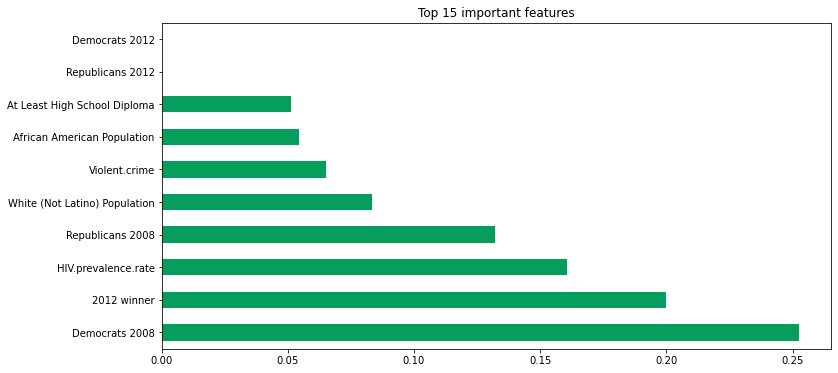

In [106]:
#ploting top 10 important features
colors = ["#059e5c"]
# Set color palette
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
rf_feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

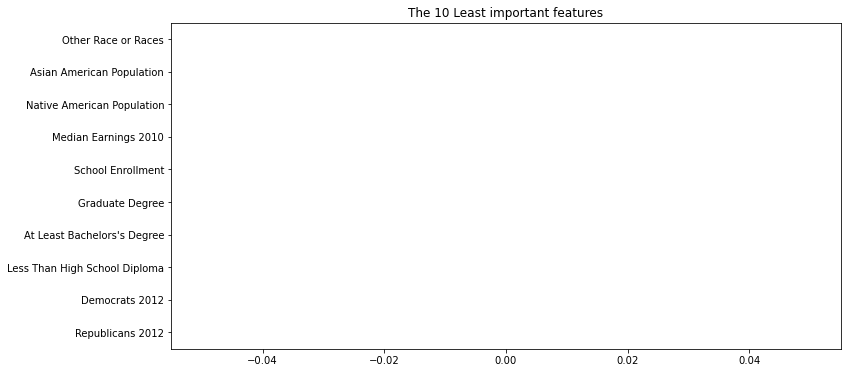

In [107]:
#getting bottom 10 importand featurs for random forrest
colors = ["#ffaa00"]
# Set color palette
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(12,6))
rf_feat_importances.nsmallest(10).plot(kind='barh')
plt.title("The 10 Least important features")
plt.show()

## Part 4 K-Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import neighbors
from sklearn.inspection import permutation_importance
from matplotlib.colors import ListedColormap

In [109]:
def evaluation_metrics(X_train, X_test, y_train, y_test, model):
    'This will produce and print the evaluation metrics for each model'
    
    pred_test = model.predict(X_test)
    
    print('Training Accuracy = {0:.3f}'.format(model.score(X_train, y_train)))
    print('Testing Accuracy = {0:.3f}'.format(model.score(X_test, y_test)))
    print('Recall = {0:.3f}'.format(recall_score(y_test, pred_test)))
    print('Precision = {0:.3f}'.format(precision_score(y_test, pred_test)))
    print('Balanced Accuracy = {0:.3f}'.format(balanced_accuracy_score(y_test, pred_test)))
    print('F1 Score = {0:.3f}'.format(f1_score(y_test, pred_test)))
    print()
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

In [110]:
X_train_ss = X_ss 

### 4.1 Find Ideal Number of Neighbors

In [111]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train_ss = []
accuracy_test_ss = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train_ss, y_train) # fit the model
    
    pred_train_ss = clf.predict(X_train_ss) # training predictions
    accuracy_train_ss.append(metrics.accuracy_score(y_true = y_train, y_pred = pred_train_ss)) 
    
    pred_test_ss = clf.predict(X_test_ss) # testing predictions
    accuracy_test_ss.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_test_ss))

In [112]:
accuracy_train_ss

[1.0,
 0.9839195979899498,
 0.9804020100502513,
 0.9798994974874372,
 0.9773869346733668,
 0.9723618090452262,
 0.9718592964824121,
 0.9718592964824121,
 0.9693467336683417,
 0.9693467336683417,
 0.9688442211055276,
 0.964321608040201,
 0.9633165829145729,
 0.9472361809045227]

In [113]:
accuracy_test_ss

[0.9438202247191011,
 0.9534510433386838,
 0.9614767255216693,
 0.9662921348314607,
 0.9695024077046549,
 0.9678972712680578,
 0.9695024077046549,
 0.9695024077046549,
 0.9695024077046549,
 0.9727126805778491,
 0.9727126805778491,
 0.9695024077046549,
 0.971107544141252,
 0.942215088282504]

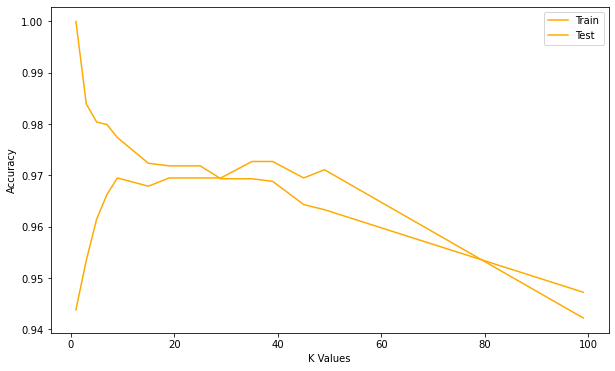

In [114]:
plt.figure(figsize=(10,6))
plt.plot(K_list, accuracy_train_ss, label='Train')
plt.plot(K_list, accuracy_test_ss, label='Test')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The testing accuracy peaks at 97.27%, which corresponds to a K-value of 35.

#### With K = 35 Neighbors

In [115]:
neigh = KNeighborsClassifier(n_neighbors=35)
neigh.fit(X_train_ss, y_train)
pred_train_ss = neigh.predict(X_train_ss)
print("Accuracy Train: ", metrics.accuracy_score(y_true = y_train, y_pred = pred_train_ss))
pred_test_ss = neigh.predict(X_test_ss)
print("Accuracy Test: ", metrics.accuracy_score(y_true = y_test, y_pred = pred_test_ss))
print(metrics.classification_report(y_true = y_test, y_pred = pred_test_ss))

Accuracy Train:  0.9693467336683417
Accuracy Test:  0.9727126805778491
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        97
           1       0.98      0.99      0.98       526

    accuracy                           0.97       623
   macro avg       0.96      0.93      0.95       623
weighted avg       0.97      0.97      0.97       623



#### Confusion Matrix

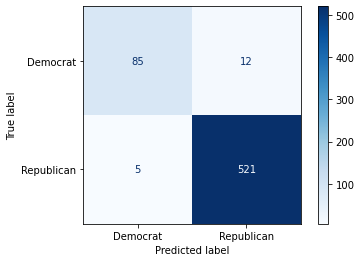

In [116]:
disp = plot_confusion_matrix(neigh, 
                             X_test_ss, y_test,
                             display_labels=['Democrat','Republican'],
                             values_format= '.0f',
                             cmap=plt.cm.Blues)

In [117]:
evaluation_metrics(X_train_ss, X_test_ss, y_train, y_test, neigh)

Training Accuracy = 0.969
Testing Accuracy = 0.973
Recall = 0.990
Precision = 0.977
Balanced Accuracy = 0.933
F1 Score = 0.984

Confusion Matrix:
[[ 85  12]
 [  5 521]]


Overall, KNN is performing quite well. However, one disadvantage of KNN is that it does not support feature selection, therefore it is challenging to gain insight into the algorithm. To understand feature importance, I will use permutation feature importance from sklearn.inspection.

### Feature Importance using permutation_importance

In [118]:
results = permutation_importance(neigh, X_test_ss, y_test, scoring='accuracy')

In [119]:
importance = results.importances_mean
feat_importances = pd.Series(importance, index=X_test.columns)
feat_importances.sort_values(ascending=False)

2012 winner                                                   0.029856
2008 winner                                                   0.013483
Democrats 2012                                                0.006421
African American Population                                   0.006100
Republicans 2008                                              0.006100
Republicans 2012                                              0.006100
Democrats 2008                                                0.005778
Child.Poverty.living.in.families.below.the.poverty.line       0.004173
At Least Bachelors's Degree                                   0.004173
Teen.births                                                   0.004173
Diabetes                                                      0.003852
Production.transportation.and.material.moving.occupations     0.003531
Asian American Population                                     0.003531
Poverty.Rate.below.federal.poverty.threshold                  0.003210
Low.bi

## <font color =blue> Experiment results 

#### Decision Tree

- The best model has high accuracy of 94%. The f1 is as high as 97% respectively. which is higher than the default model, so it performs better than the default model. The specification is 92%. 
- We have reduce the effect of an imbalanced target class as we specify the class weight and use the balanced accuracy score in GridSearchCV. 
- The obvious improvement is that the GridSearchCV model can predict both class 0 (minority) and class 1(majority) well .
- Comparing to the default model, the best model is less overfitting as the accuracy rate of train and test set are high and close to each other.
- From the best Decision Tree in part 1.2, we can indentify that the "2012 winner" variable is the most important feature which is located at the root node.
- The second most important feature is the "2008 winner" which is the election results from 2008.
- Other demographic features such as race, and education level features also have a high influence on the target variable.
- Comparing to the health condition and surrounding factors, the demographic features such as race and education level have more influence on election winner.

#### Logistic Regression

 - The best model had a 98.44% accuracy. This out performed the base model by over 4%. 
 - The tuned model utilized l2 regularization and pushed over 50% of the features to 0. 
 - We can see from a probability plot that out model is performing as expected in terms of high probabisitic predictions. Essentially, we are very sure of our estimates with this model. 
 - After analyzing the coefficients, can see that having at least a Bachelor's Degree, and what the counties party choice in 2008 and 2012 were the most important predictors. 


#### Random Forest

- In the oprimized model I was able to get accuracy of 90.5%  This went down from 97% I got with the basic model.  That said my test and training model accuracy is closer.
- From a random forest point of view there are 7 key features neeed to predict the out come of a county. 2008 winer, HV,prevelance rate,2012 winner, graduate degree, at least a bachelors degree, farming, fishing and forestry occupation.
- this is telling me that knowing the education of the county and knowing the party winner form the priot two elections are all very important. 
- farming, fishing and forest seems to be an interesting on for why that is so important.
- Suprisingly with random forest the ethniticity doesn't really factor into the election
- The two interesting ones of importance that stick out is HIV rate and homicide rate

#### K-Nearest Neighbors

- The number of neighbors that produced the highest accuracy in the testing set is 35
- This produces an accuracy of 97.3% with a recall value of 0.990 and precision of 0.977. The F1 score is 0.984
- Like the other models, 2012 and 2008 winners are found to be the most important features. However, we had to use permutation_importance to find these rankings

## <font color =blue> Research questions results 

### 1.  What variables overall are most important to predicting the outcome of an election?
- The most important variables to predicting the outcome of an election are the winning result from the previous election in year 2008 and 2012.
- Other demograhic variables related to race, education level, median ages, and household condition also have a high influence on the target variable as their important scores are significantly higher than other features.
- Comparing to the features that are related to characteristics of voters, the features that are related to surrounding of counties has a less influence on the prediction outcome.

### 2. What role, if any, do demographic characteristics play in the outcome of an election? 

- Based on  decision tree classifier, we can conclude that the median age and race features play important roles on the voters' preferences on a political party.
- For example, if the median age of the voters in the county is less than 38.15 years old, it is likely that the democatic candidate will win the election for that county.
- Additionally, if the county has the percentage of Asian American voters less than 2.5%, the democatic candidate will be likely to win the election. On the other hand, if the percentage of White voters are less than 47%, the Republican candidate has a high chance to win the election.
- The education level also play an important role in which if the percentage of voters in the county who has at keast bachelor's degree is less than 18%, the Republican candidate is likely to win the election for that county.

## <font color =blue> Next steps 

- We have completed the feature selection in part 1.3 and will build the new models based on the top 15 important features to check for the improvement of the new model.
- PCA will also be implemented to reduce the feature dimension.
- We will further examine the existing models to ensure they are not overfitting
- Additionally, we observed that some features have a non-linear relationships, so we plan to apply SVM kernel to see if it can further improve our model.
- In the last step, we will select the best model from each classifier and compare their performance with the validation set and select the best model to perform the final evaluation with our test set.

## <font color =blue> Contributions

#### For data preprocessing, cleaning, and exploration, all team members worked together via Google CoLab to preprocess data and perform data exploration. We have divided the tasks equally in which each of us is responsible to build the models with different Machine Learning algorithms. The specific details of individual contribution are discussed below. 

#### Markus Olson: 

- Built random forest model with default parameters and Grid search
- Identified random forest important features
- Answered research question the team has posed
- Assisted in the comentray on the data evaluation
- Found the data set
- Organize and contribute to team meetings
- did the video for the project proposal
- Future plan: Run PCA to see if we can optimize the model even further with random forest, also run the model with the normalized data.

#### Sarah Danielson:

- Built the KNN classifier and used variety of k-values to find the optimal number of neighbors
- Helped create the 2008 and 2012 winner variables 
- Assisted in commentary and edited the Milestone Write-up
- Contribute in team meetings
- Future plan: I will experiment with different types of distances (for example, Minkowski, Euclidean, and Manhattan) to see if that improves the accuracy of KNN. I also plan to visualize the decision boundaries of the clusters, perhaps using PCA to create the graph. I will also look for more ways to understand the feature importance and demographic information.

#### Amy Aumpansub:

- Built the decision trees model with the default parameters and GridSearchCV 
- Identified the important features and compare the decision tree models
- Performed feature selection and visualize the most and least important features using ExtraTreesClassifier 
- Answered some of research questions based on the model outputs and found results
- Assisted in Milestone Write-up and data summary
- Future plan: In coming weeks, I plan to build new models from the selected important features and check for the model performance and build more complex models by applying SVM model with kernel to capture non-linear relationship among features.

#### Charles Brantley:

 - Built a base logistic regression model and performed tuning via randomized and grid search
 - Evaluated the best model and explored metrics
 - Explored coefficients and features in the model 
 - Assisted in Milestone Write-up 
 - Future plan: I plan to explore elastic net regression and see if I can really shrink the number of parameters the ML model needs. 